In [33]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False


In [34]:
df = pd.read_csv("电子产品销售分析.csv")
df.info

<bound method DataFrame.info of         Unnamed: 0               event_time             order_id  \
0                0  2020-04-24 11:50:39 UTC  2294359932054536986   
1                1  2020-04-24 11:50:39 UTC  2294359932054536986   
2                2  2020-04-24 14:37:43 UTC  2294444024058086220   
3                3  2020-04-24 14:37:43 UTC  2294444024058086220   
4                4  2020-04-24 19:16:21 UTC  2294584263154074236   
...            ...                      ...                  ...   
564164     2633516  2020-11-21 10:10:01 UTC  2388440981134693942   
564165     2633517  2020-11-21 10:10:13 UTC  2388440981134693943   
564166     2633518  2020-11-21 10:10:30 UTC  2388440981134693944   
564167     2633519  2020-11-21 10:10:30 UTC  2388440981134693944   
564168     2633520  2020-11-21 10:10:30 UTC  2388440981134693944   

                 product_id   category_id                category_code  \
0       1515966223509089906  2.268105e+18           electronics.tablet   
1  

In [35]:
df['event_time'] = pd.to_datetime(df['event_time'].str[:19],format="%Y-%m-%d %H:%M:%S")
# 添加列，方便后面数据分析
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['Dayofweek'] = df['event_time'].dt.dayofweek
df['hour'] = df['event_time'].dt.hour
df

Unnamed: 0          event_time             order_id  \
0                0 2020-04-24 11:50:39  2294359932054536986   
1                1 2020-04-24 11:50:39  2294359932054536986   
2                2 2020-04-24 14:37:43  2294444024058086220   
3                3 2020-04-24 14:37:43  2294444024058086220   
4                4 2020-04-24 19:16:21  2294584263154074236   
...            ...                 ...                  ...   
564164     2633516 2020-11-21 10:10:01  2388440981134693942   
564165     2633517 2020-11-21 10:10:13  2388440981134693943   
564166     2633518 2020-11-21 10:10:30  2388440981134693944   
564167     2633519 2020-11-21 10:10:30  2388440981134693944   
564168     2633520 2020-11-21 10:10:30  2388440981134693944   

                 product_id   category_id                category_code  \
0       1515966223509089906  2.268105e+18           electronics.tablet   
1       1515966223509089906  2.268105e+18           electronics.tablet   
2       2273948319057183658  2.268105e+18  electronics.audio.headphone   
3       2273948319057183658  2.268105e+18  electronics.audio.headphone   
4       2273948316817424439  2.268105e+18                          NaN   
...                     ...           ...                          ...   
564164  1515966223526602848  2.268105e+18       electronics.smartphone   
564165  1515966223509089282  2.268105e+18       electronics.smartphone   
564166  1515966223509089917  2.268105e+18   appliances.personal.scales   
564167  2273948184839454837  2.268105e+18                          NaN   
564168  1515966223509127566  2.268105e+18   appliances.kitchen.blender   

           brand   price       user_id   age sex local  Month  Day  Dayofweek  \
0        samsung  162.01  1.515916e+18  24.0   女    海南      4   24          4   
1        samsung  162.01  1.515916e+18  24.0   女    海南      4   24          4   
2         huawei   77.52  1.515916e+18  38.0   女    北京      4   24          4   
3         huawei   77.52  1.515916e+18  38.0   女    北京      4   24          4   
4        karcher  217.57  1.515916e+18  32.0   女    广东      4   24          4   
...          ...     ...           ...   ...  ..   ...    ...  ...        ...   
564164      oppo  138.87  1.515916e+18  21.0   男    上海     11   21          5   
564165     apple  418.96  1.515916e+18  21.0   女    北京     11   21          5   
564166     vitek   12.48  1.515916e+18  19.0   女    上海     11   21          5   
564167  moulinex   41.64  1.515916e+18  19.0   女    上海     11   21          5   
564168   redmond   53.22  1.515916e+18  19.0   女    上海     11   21          5   

        hour  
0         11  
1         11  
2         14  
3         14  
4         19  
...      ...  
564164    10  
564165    10  
564166    10  
564167    10  
564168    10  

[564169 rows x 16 columns]

In [36]:
# 0-6 [0,6]
# 6-12 [6,12]
# 12-18 [12,18]
# 18-24 [18,24]
bins=[0,6,12,18,24]
df['time_box'] = pd.cut(df['hour'],bins,labels=['0-6','7-12','13-18','19-24'])
# df.loc[df["hour"]==23][["hour","time_box"]]


In [37]:
bins=[0,20,40,59,np.inf]
df['age_box'] = pd.cut(df['age'],bins,labels=['0-20','21-40','41-59','60+'])


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     564169 non-null  int64         
 1   event_time     564169 non-null  datetime64[ns]
 2   order_id       564169 non-null  int64         
 3   product_id     564169 non-null  int64         
 4   category_id    564169 non-null  float64       
 5   category_code  434799 non-null  object        
 6   brand          536945 non-null  object        
 7   price          564169 non-null  float64       
 8   user_id        564169 non-null  float64       
 9   age            564169 non-null  float64       
 10  sex            564169 non-null  object        
 11  local          564169 non-null  object        
 12  Month          564169 non-null  int64         
 13  Day            564169 non-null  int64         
 14  Dayofweek      564169 non-null  int64         
 15  

In [39]:
bins=[0,50,100,150,200,np.inf]
df['price_box'] = pd.cut(df['price'],bins,labels=['0-50','51-100','101-150','151-200',"200+"])

In [42]:
data = df.groupby(["local","price_box","age_box"])[["order_id"]].nunique()
data

order_id
local price_box age_box          
上海    0-50      0-20         3735
                21-40       15073
                41-59        8345
                60+             0
      51-100    0-20         1411
...                           ...
重庆    151-200   60+             0
      200+      0-20         1131
                21-40        5570
                41-59        2423
                60+             0

[220 rows x 1 columns]

<AxesSubplot:xlabel='local'>

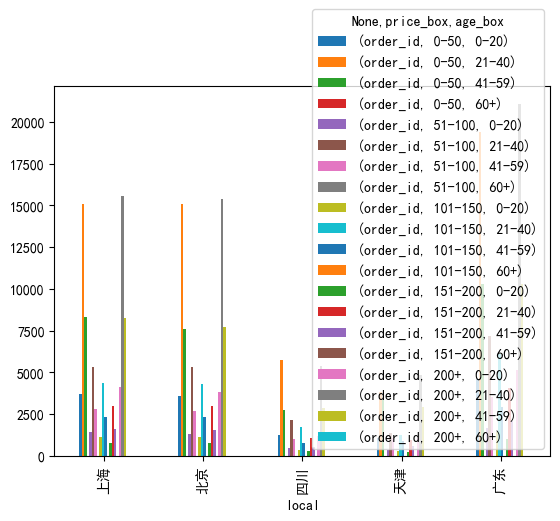

In [45]:
data1 = data.pivot_table(index="local",columns=["price_box","age_box"])
data1.head(5).plot.bar()

In [47]:
data2 = df.groupby(["local","time_box","brand"]).agg({"order_id":"count","price":"sum"})
data2.pivot_table(index="local",columns=["time_box","brand"])





order_id                                                             \
time_box      0-6                                                              
brand      a-case acana accesstyle action activision adguard adidas advantek   
local                                                                          
上海             16     0          4      0          1       0      1        7   
北京              8     0          3      0          2       0      1       12   
四川              4     0          1      0          1       0      0        2   
天津              3     0          0      0          0       0      0        4   
广东             30     0          1      0          1       1      0        2   
江苏              9     0          0      0          0       0      1        5   
浙江              6     0          1      0          0       0      0        1   
海南              3     1          1      0          0       0      0        1   
湖北              1     0          1      0          1       0      0        5   
湖南              3     0          1      0          0       0      0        4   
重庆              3     0          2      0          1       0      0        1   

                       ... price                                           \
time_box               ... 19-24                                            
brand    aeg aerocool  ... zenit zeppelin zeta zevs  zhiyun zhorka zlatek   
local                  ...                                                  
上海         1       25  ...   0.0     0.00  0.0  0.0  497.66   0.00   0.00   
北京         2       24  ...   0.0    26.37  0.0  0.0  624.98   0.00  60.16   
四川         0        8  ...   0.0     0.00  0.0  0.0    0.00   0.00   0.00   
天津         0       14  ...   0.0     0.00  0.0  0.0  231.46   0.00   0.00   
广东         7       32  ...   0.0    26.83  0.0  0.0  231.46   0.00   0.00   
江苏         0       16  ...   0.0     0.00  0.0  0.0    0.00   0.00   0.00   
浙江         0        7  ...   0.0     0.00  0.0  0.0    0.00   0.00   0.00   
海南         0       14  ...   0.0     0.00  0.0  0.0    0.00   0.00   0.00   
湖北         2        9  ...   0.0     0.00  0.0  0.0    0.00   0.93   0.00   
湖南         1       17  ...   0.0     0.00  0.0  0.0    0.00   0.00   0.00   
重庆         1       10  ...   0.0     0.00  0.0  0.0   92.57   0.00   0.00   

                                
time_box                        
brand      zowie zugo zwilling  
local                           
上海        199.02  0.0   263.84  
北京         85.63  0.0     0.00  
四川         99.51  0.0   270.77  
天津         99.51  0.0     0.00  
广东        550.77  0.0     0.00  
江苏         46.27  0.0     0.00  
浙江         85.63  0.0    21.74  
海南          0.00  0.0     0.00  
湖北          0.00  0.0     0.00  
湖南         99.51  0.0     0.00  
重庆          0.00  0.0    22.43  

[11 rows x 6944 columns]